In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [158]:
df = pd.read_csv('data/nsw74psid1.csv')

In [159]:
df

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
0,0,47,12,0,0,0,0,0.00,0.00,0.000
1,0,50,12,1,0,1,0,0.00,0.00,0.000
2,0,44,12,0,0,0,0,0.00,0.00,0.000
3,0,28,12,1,0,1,0,0.00,0.00,0.000
4,0,54,12,0,0,1,0,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
2670,1,33,12,1,0,1,0,20279.95,10941.35,15952.600
2671,1,25,14,1,0,1,0,35040.07,11536.57,36646.950
2672,1,35,9,1,0,1,1,13602.43,13830.64,12803.970
2673,1,35,8,1,0,1,1,13732.07,17976.15,3786.628


In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [161]:
X, y = df.drop('re78', axis=1), df['re78']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [162]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
svr = SVR(kernel='rbf', C=1, gamma=0.1)
svr.fit(X_train, y_train)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [163]:
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
a = pd.DataFrame([np.sqrt(mean_squared_error(y_test, lin_model.predict(X_test))), np.sqrt(mean_squared_error(y_test, svr.predict(X_test))), np.sqrt(mean_squared_error(y_test, dtr.predict(X_test)))], index=['lin_model', 'svr', 'dtr'])
b = pd.DataFrame([r2_score(y_test, lin_model.predict(X_test)), r2_score(y_test, svr.predict(X_test)), r2_score(y_test, dtr.predict(X_test))], index=['lin_model', 'svr', 'dtr'])
c = pd.DataFrame([np.sqrt(mean_squared_error(y_train, lin_model.predict(X_train))), np.sqrt(mean_squared_error(y_train, svr.predict(X_train))), np.sqrt(mean_squared_error(y_train, dtr.predict(X_train)))], index=['lin_model', 'svr', 'dtr'])


In [165]:
a

,0
lin_model,11342.570898
svr,16920.996489
dtr,13810.964039


In [166]:
b

,0
lin_model,0.553823
svr,0.007030
dtr,0.338496


In [167]:
c

,0
lin_model,9901.098466
svr,15401.802576
dtr,834.183387


<Axes: ylabel='re78'>

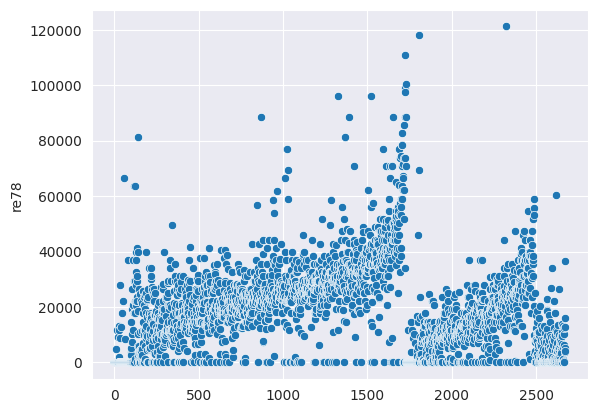

In [168]:
sns.scatterplot(x=range(2675), y=df['re78'])